# Task: You will use the 'Iris.csv' dataset. The dataset corresponds to a clustering problem on which you need to make predictions based on given the 3 iris species with 50 samples each, as well as some properties about each flower in the dataset. You are asked to predict the classes of flowers by using K-means and Hierarchical Clustering methods.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\l

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

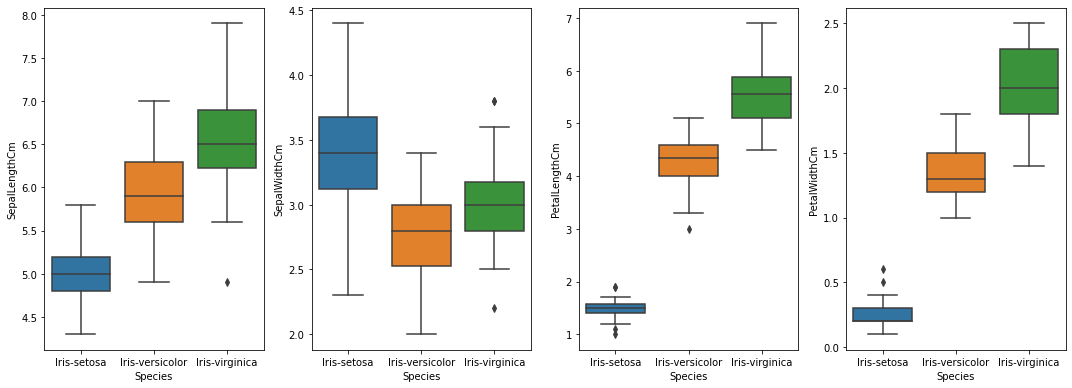

In [4]:
plt.rcParams["figure.figsize"] = [15.00, 5.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 4)
sns.boxplot('Species','SepalLengthCm',data=df,ax=axes[0])
sns.boxplot('Species','SepalWidthCm',data=df,ax=axes[1])
sns.boxplot('Species','PetalLengthCm',data=df,ax=axes[2])
sns.boxplot('Species','PetalWidthCm',data=df,ax=axes[3])

In [5]:
X = df.iloc[:, 1:5].values

In [6]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

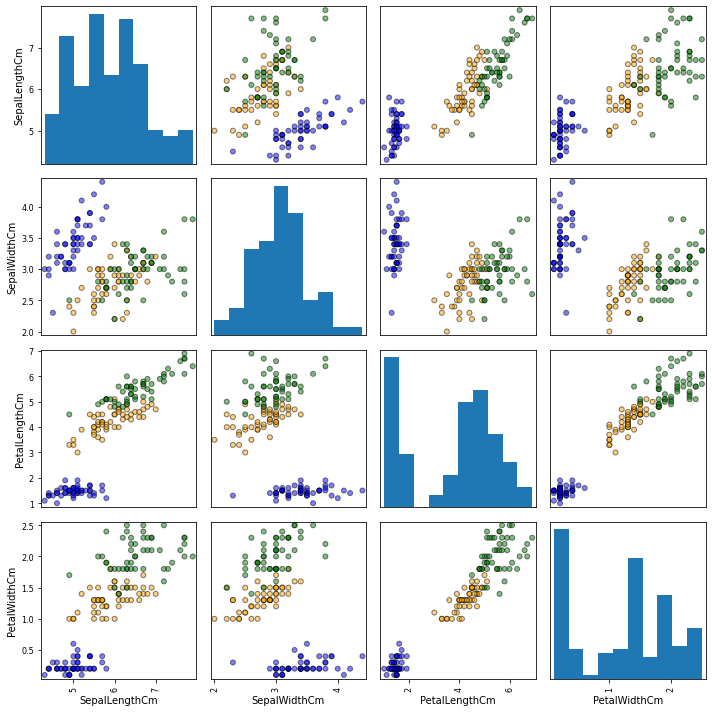

In [7]:
def color_generate():
    colors=[]
    for i in df.loc[:,'Species']:
        if i=='Iris-setosa':
            colors.append('blue')
        elif i=='Iris-versicolor':
            colors.append('orange')
        else:
            colors.append('green')
    return colors
        
pd.plotting.scatter_matrix(df.iloc[:, 1:5],
                                       c=color_generate(),
                                       figsize= [10,10],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 100,
                                       edgecolor= "black")
plt.show()

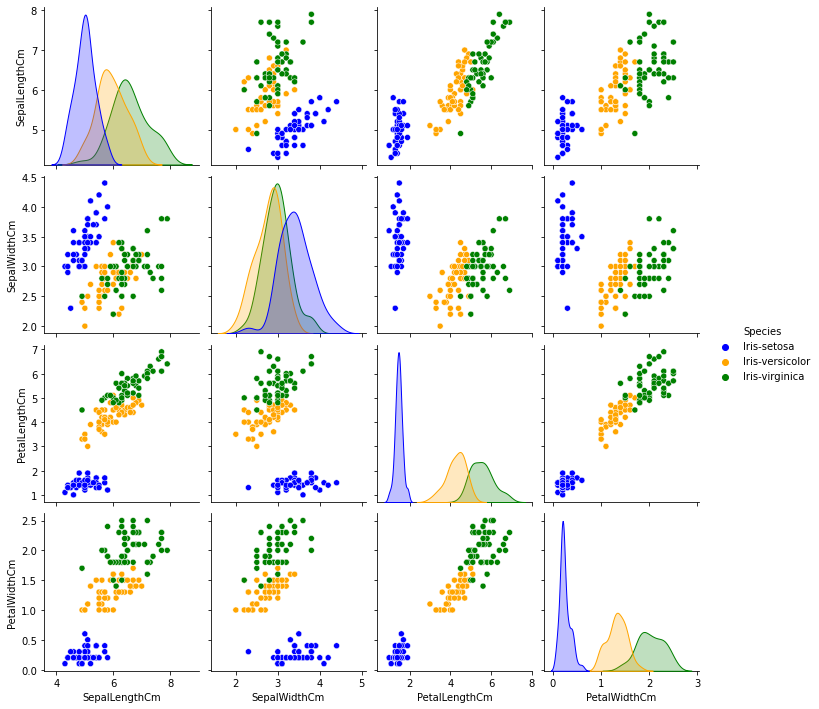

In [25]:
sns.pairplot(df.iloc[:,1:6], hue="Species", markers=None, 
             palette={"Iris-setosa":"blue","Iris-versicolor":"orange","Iris-virginica":"green"})

<AxesSubplot:>

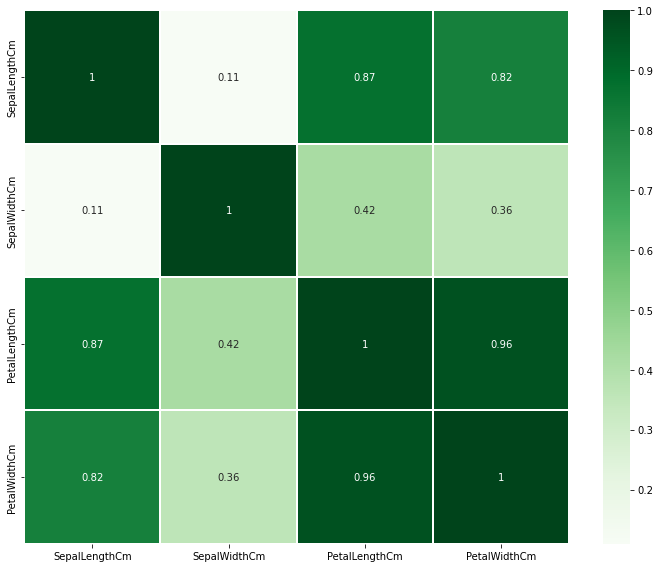

In [26]:
corr=df.iloc[:,1:6].corr().abs()
fig, ax=plt.subplots(1,1,figsize=(10,8))
sns.heatmap(corr,annot=True, linewidth=1.8, ax=ax,cmap="Greens")

# Choosing SepalWidthCm & PetalLengthCm columns for K-means clustering.

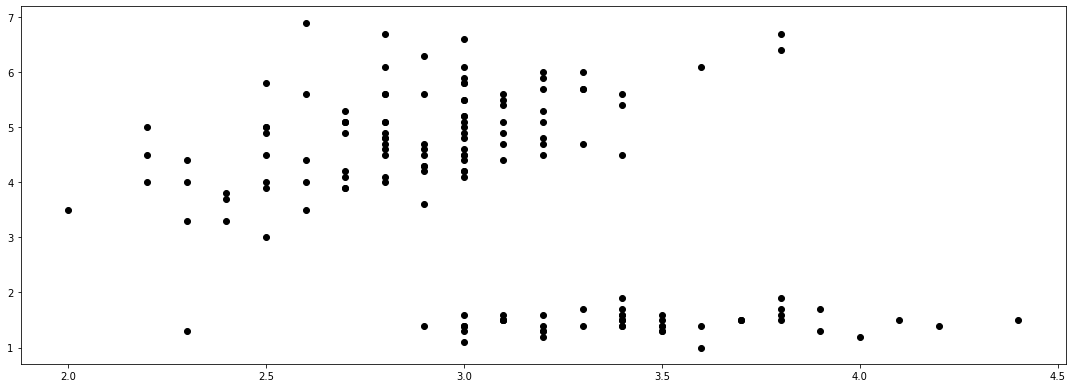

In [10]:
x1 = df["SepalWidthCm"]
x2 = df["PetalLengthCm"]
plt.scatter(x1 ,x2 ,color = "black")

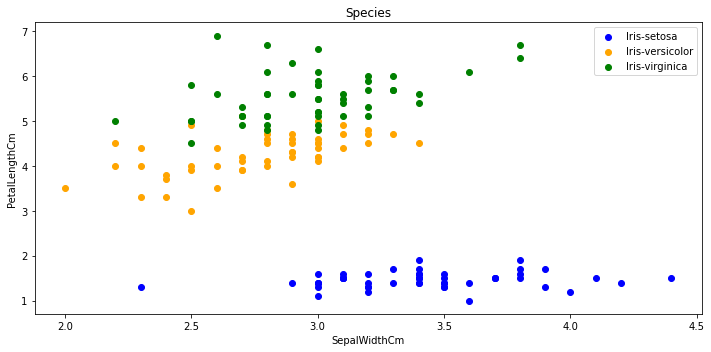

In [11]:
fig = plt.figure(figsize = (10,5))
plt.title('Species')
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalLengthCm')
plt.scatter(df[df["Species"] == "Iris-setosa"].SepalWidthCm , df[df["Species"] == "Iris-setosa"].PetalLengthCm,color = "blue",label="Iris-setosa")
plt.scatter(df[df["Species"] == "Iris-versicolor"].SepalWidthCm , df[df["Species"] == "Iris-versicolor"].PetalLengthCm,color = "orange",label="Iris-versicolor")
plt.scatter(df[df["Species"] == "Iris-virginica"].SepalWidthCm , df[df["Species"] == "Iris-virginica"].PetalLengthCm,color = "green",label="Iris-virginica")
plt.legend()
plt.show()

In [27]:
cluster_data=pd.DataFrame({"x1":x1,"x2":x2})
cluster_data

,x1,x2
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
...,...,...
145,3.0,5.2
146,2.5,5.0
147,3.0,5.2
148,3.4,5.4


# K-means

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


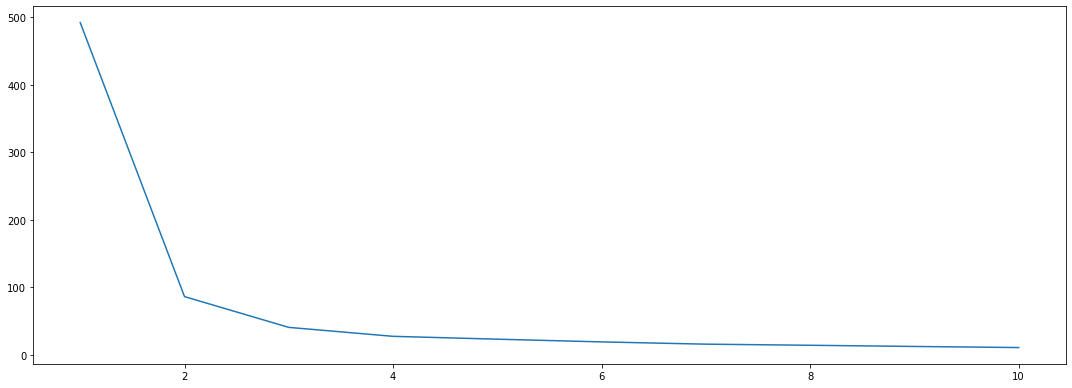

In [13]:
wcss_3 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state= 123)
    kmeans.fit(cluster_data)
    wcss_3.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_3)

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(cluster_data)

In [15]:
df['cluster']=y_kmeans

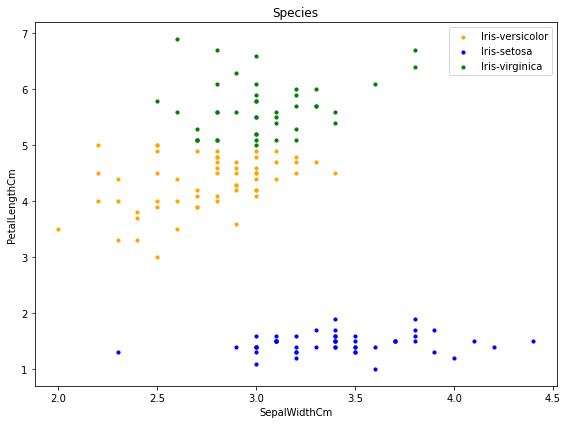

In [31]:
fig = plt.figure(figsize = (8,6))
plt.title('Species')
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalLengthCm')
plt.scatter(cluster_data['x1'][y_kmeans==0],cluster_data['x2'][y_kmeans==0],s=10,c='orange',label='Iris-versicolor')
plt.scatter(cluster_data['x1'][y_kmeans==1],cluster_data['x2'][y_kmeans==1],s=10,c='blue',label='Iris-setosa')
plt.scatter(cluster_data['x1'][y_kmeans==2],cluster_data['x2'][y_kmeans==2],s=10,c='green',label='Iris-virginica')
plt.legend()
plt.show()

# Accuracy check

In [20]:
data_for_acc=pd.read_csv('Iris.csv')
data_for_acc.Species.replace('Iris-virginica', 2,inplace=True)
data_for_acc

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [21]:
data_for_acc=pd.read_csv('Iris.csv')
data_for_acc.Species.replace('Iris-versicolor', 0,inplace=True)
data_for_acc.Species.replace('Iris-setosa', 1,inplace=True)
data_for_acc.Species.replace('Iris-virginica', 2,inplace=True)
data_for_acc

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [23]:
actual_class=data_for_acc["Species"]
predicted_class=df['cluster']

In [24]:
print("accuracy is : {}".format((100 - np.mean(np.abs(actual_class - predicted_class)))/100))

accuracy is : 0.9985333333333334


# Hierarchical Cluster

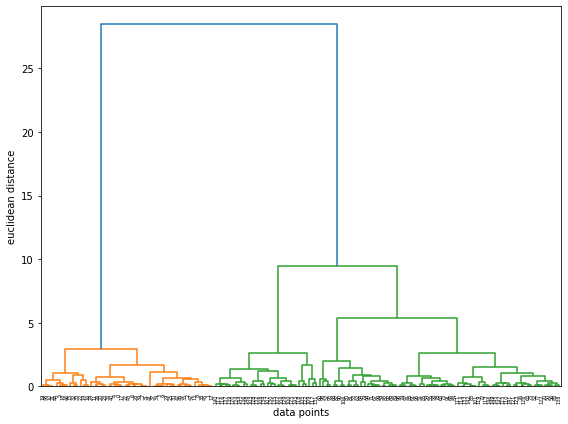

In [36]:
fig = plt.figure(figsize = (8,6))
merg = linkage(cluster_data,method="ward")
dendrogram(merg)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [37]:
h_c = AgglomerativeClustering(n_clusters = 3,affinity= "euclidean",linkage = "ward")
cluster_hc = h_c.fit_predict(cluster_data)

df["hc_cluster"] = cluster_hc

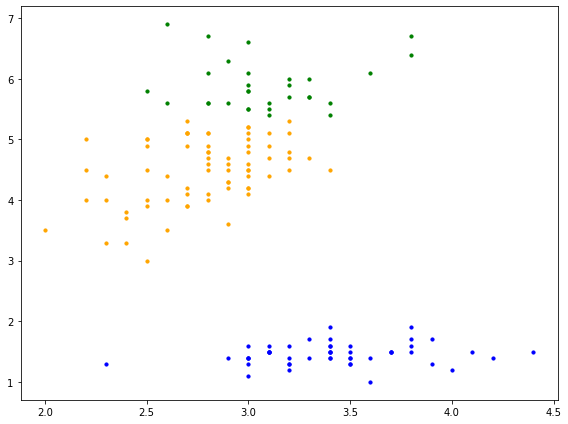

In [39]:
fig = plt.figure(figsize = (8,6))
plt.scatter(cluster_data['x1'][cluster_hc==0],cluster_data['x2'][cluster_hc==0],s=10,c='orange',label='Iris-versicolor')
plt.scatter(cluster_data['x1'][cluster_hc==1],cluster_data['x2'][cluster_hc==1],s=10,c='blue',label='Iris-setosa')
plt.scatter(cluster_data['x1'][cluster_hc==2],cluster_data['x2'][cluster_hc==2],s=10,c='green',label='Iris-virginica')

In [42]:
actual_class=data_for_acc["Species"]
predicted_class_hc=df['hc_cluster']
print("accuracy is : {}".format((100 - np.mean(np.abs(actual_class - predicted_class_hc)))/100))

accuracy is : 0.9973333333333333


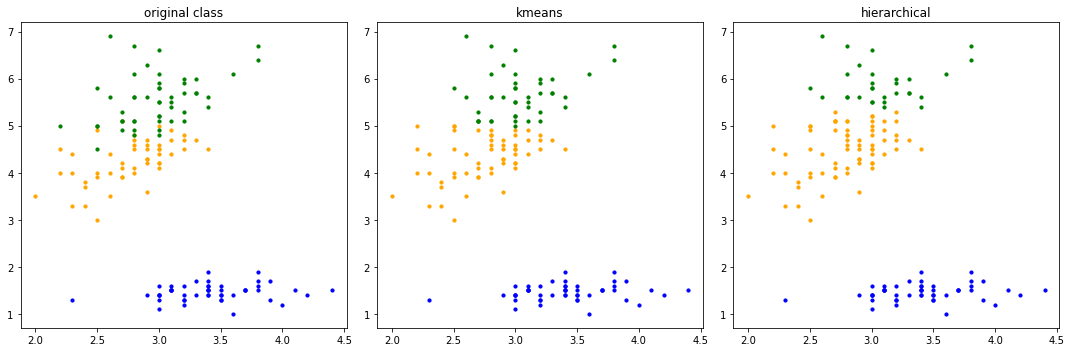

In [44]:
fig = plt.figure(figsize = (15,5))

plt.subplot(1, 3, 1)
plt.scatter(df[df["Species"] == "Iris-setosa"].SepalWidthCm , df[df["Species"] == "Iris-setosa"].PetalLengthCm,s=10,color = "blue")
plt.scatter(df[df["Species"] == "Iris-versicolor"].SepalWidthCm , df[df["Species"] == "Iris-versicolor"].PetalLengthCm,s=10,color = "orange")
plt.scatter(df[df["Species"] == "Iris-virginica"].SepalWidthCm , df[df["Species"] == "Iris-virginica"].PetalLengthCm,s=10,color = "green")
plt.title("original class")

plt.subplot(1, 3, 2)
plt.scatter(cluster_data['x1'][y_kmeans==0],cluster_data['x2'][y_kmeans==0],s=10,c='orange')
plt.scatter(cluster_data['x1'][y_kmeans==1],cluster_data['x2'][y_kmeans==1],s=10,c='blue')
plt.scatter(cluster_data['x1'][y_kmeans==2],cluster_data['x2'][y_kmeans==2],s=10,c='green')
plt.title("kmeans") 

plt.subplot(1, 3, 3)
plt.scatter(cluster_data['x1'][cluster_hc==0],cluster_data['x2'][cluster_hc==0],s=10,c='orange')
plt.scatter(cluster_data['x1'][cluster_hc==1],cluster_data['x2'][cluster_hc==1],s=10,c='blue')
plt.scatter(cluster_data['x1'][cluster_hc==2],cluster_data['x2'][cluster_hc==2],s=10,c='green')
plt.title("hierarchical")
plt.show()

# As we can see from graphs above and from accuracy scores (99,85% for K-means & 99.73% for Hierarchical cl.) K-means clustering fits better for this data.